In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load
import statistics as st

In [2]:
y   = load('../../March2021/Observation_models/ObsY.joblib') 
CNN = load('../../March2021/Observation_models/CNNY.joblib') 
LR  = load('../../March2021/Observation_models/LRY.joblib')
SVR  = load('../../March2021/Observation_models/SVRY.joblib')

ACCESS_CM2_CNN = load('ACCESS-CM2-CNN-Y1.joblib')

IITMESM_CNN = load('IITM-ESM-CNN-Y1.joblib')

IPSL_CM6A_LR_CNN = load('IPSL-CM6A-LR-CNN-Y1.joblib')

MPI_ESM1_2_LR_CNN = load('MPI-ESM1-2-LR-CNN-Y1.joblib')

MPI_ESM1_2_HR_CNN = load('MPI-ESM1-2-HR-CNN-Y.joblib')

EC_Earth3_CNN = load('EC-Earth3-CNN-Y1.joblib')



In [3]:
def getSeasonalCycle( dArray ):
   #"This function gives TS of categories of each type for each season e.g. if year
   #  is 1981 then it will contain values between 1dec1980 to 31jan1981"
    fg=dArray.groupby('time.dayofyear').mean()
    
    
    
    return fg

In [4]:
obsS=getSeasonalCycle(y)
obsS
obsS.dayofyear


<xarray.DataArray 'dayofyear' (dayofyear: 63)>
array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345,
       346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359,
       360, 361, 362, 363, 364, 365, 366])
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366

In [5]:
obsS.sel(dayofyear=366)
obsS

<xarray.DataArray 'fogdata' (dayofyear: 63)>
array([0.40923077, 0.42461538, 0.43179487, 0.42358974, 0.4       ,
       0.42153846, 0.42871795, 0.40717949, 0.40615385, 0.36717949,
       0.36512821, 0.36410256, 0.35692308, 0.33641026, 0.29435897,
       0.30666667, 0.31692308, 0.31384615, 0.32820513, 0.30153846,
       0.28512821, 0.28102564, 0.27487179, 0.23692308, 0.24102564,
       0.22871795, 0.23076923, 0.25435897, 0.23897436, 0.23487179,
       0.18666667, 0.12827586, 0.14564103, 0.13641026, 0.15487179,
       0.1374359 , 0.16307692, 0.20410256, 0.21025641, 0.23282051,
       0.20820513, 0.20512821, 0.24410256, 0.23897436, 0.24820513,
       0.23384615, 0.24307692, 0.29846154, 0.32307692, 0.33128205,
       0.31794872, 0.30769231, 0.31179487, 0.35076923, 0.35487179,
       0.34666667, 0.35897436, 0.37435897, 0.37641026, 0.38564103,
       0.39076923, 0.37538462, 0.356     ])
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366

In [10]:
x=(32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31)

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

0.23874976


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


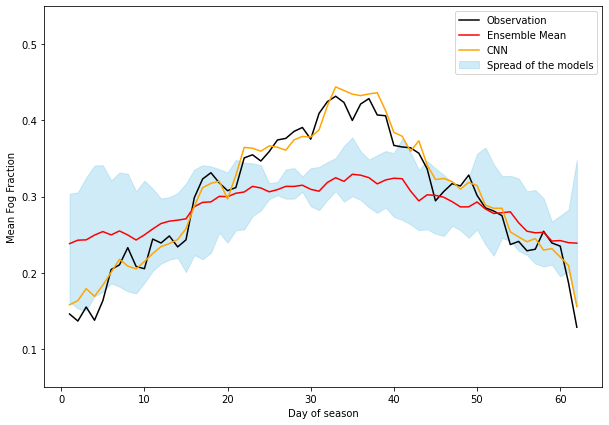

0.23812304
0.24267386
0.2430839
0.24935375
0.2539476
0.24961315
0.25480273
0.24949266
0.2428794
0.24961872
0.25741342
0.26455805
0.26766554
0.26896086
0.27070868
0.28667325
0.2923414
0.29296383
0.30025548
0.29983935
0.3043066
0.3059877
0.31336823
0.31126794
0.3062183
0.30905786
0.31337854
0.3133022
0.31489992
0.30951467
0.30701423
0.31845757
0.32475278
0.31992784
0.32926333
0.328082
0.32479963
0.31663838
0.32178
0.32410583
0.32339668
0.30727357
0.29423067
0.30226102
0.30157685
0.2990461
0.29329208
0.28639057
0.28644177
0.2929019
0.28371948
0.27777588
0.27873656
0.27994135
0.26558113
0.25443205
0.25237697
0.25291273
0.24156861
0.24212782
0.23940654
0.23874976


In [7]:
fig = plt.figure(figsize=(10,7))
#fig = plt.figure(figsize=(10,5))
x=np.arange(1,63)
#fMean=list()
fCC=list()
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]
OTs

CNNTs1=getSeasonalCycle(CNN)
CNNTs2=CNNTs1.roll(dayofyear=31)
CNNTs=CNNTs2[(CNNTs2.dayofyear<366) | (CNNTs2.dayofyear>366)]
CNNTs

MTs=[]

fList=(ACCESS_CM2_CNN,IITMESM_CNN,
       IPSL_CM6A_LR_CNN, MPI_ESM1_2_LR_CNN, MPI_ESM1_2_HR_CNN, 
       EC_Earth3_CNN)

for fL in fList:
    ts1=getSeasonalCycle(fL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    MTs.append(ts)
    
    
MS=np.array(MTs)
print(np.mean(MS[:,61]))

meanMS=np.mean(MS, axis=0)
minMS=np.amin(MS,axis=0)
maxMS=np.amax(MS,axis=0)

x=np.arange(1,63)


plt.fill_between(x, maxMS,minMS,
                 color="skyblue", alpha=0.4,label='Spread of the models')
#plt.fill_between(x, minMS,
#                 color="white", alpha=0.4)
plt.plot(x,OTs,label='Observation', color='black')
plt.plot(x,meanMS,label='Ensemble Mean', color='red')
plt.plot(x,CNNTs,label='CNN', color='orange')
plt.ylim([0.05, 0.55])
    
plt.xlabel('Day of season')
plt.ylabel('Mean Fog Fraction')     
plt.legend()

plt.savefig('Best5_Historical_FogFraction_SC_ModelsSpread.eps')
plt.show()
print('\n'.join(map(str, meanMS))) 

ensTs=OTs.copy()
ensTs.values=meanMS
#dump(ensTs,'../../April2021/Future_projection_plots/FF_historical_ensembleMean_Best5.joblib')
#ensTs